In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.utils.np_utils import to_categorical 
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist

2022-11-15 16:06:29.658745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 16:06:29.760871: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 16:06:29.764379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 16:06:29.764387: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

#Check Y dataset
print('\ny_train dimension:',y_train.shape)
print('Sample y_train:',y_train[:20,])

# compute the number of labels
num_labels = len(np.unique(y_train))
print('\nUnique Labels:',num_labels)


y_train dimension: (60000,)
Sample y_train: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]

Unique Labels: 10


In [3]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Check one-hot encoded y dataset
print('y_train dimension:',y_train.shape)
print('\nSample y_train:',y_train[:10,:])

y_train dimension: (60000, 10)

Sample y_train: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
# Check X train dimension
print('X train shape:',x_train.shape)

X train shape: (60000, 28, 28)


In [5]:
#Input Image size
image_size = x_train.shape[1]

# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# network parameters
# image is processed as is (square grayscale)

input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))

model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))

model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

2022-11-15 16:06:38.073668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 16:06:38.073684: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 16:06:38.073697: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (crumblerworm): /proc/driver/nvidia/version does not exist
2022-11-15 16:06:38.073863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
history_max=model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.2604 - accuracy: 0.9194
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0675 - accuracy: 0.9794
Epoch 3/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0404 - accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0335 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0289 - accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 10/10
469/469 [==============================] - 17s 36ms/step - loss: 0.018

In [8]:
print(history_max)
loss_max, acc_max = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.2f%%" % (100.0 * acc_max))
print("\nTest loss: %.3f" %loss_max)

79/79 [==============================] - 1s 13ms/step - loss: 0.0293 - accuracy: 0.9907

Test accuracy: 99.07%

Test loss: 0.029


In [9]:
#Make predictions using the trained model
y_pred_max =model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


### Diagnose the trained CNN model, which digits are least and most misclassified by the model in the test dataset? 
<br><br>

In [10]:
# Organize predictions and model
class_model = np.argmax(y_pred_max,axis=1)
class_test = np.argmax(y_test,axis=1)

# Find incorrect predictions
incorrects = np.where(class_model != class_test)[0]
print('Total Incorrect Classifications:',len(incorrects))

# Get true and predictions from the misclassified indices
true_labels=class_test[incorrects]
pred_labels=class_model[incorrects]

# Combine into matrix and find frequency
misclass=np.unique(np.array([true_labels, pred_labels]),
                    return_counts=True)

# Output maximum and minimum misclassifications
max=np.argmax(misclass[1])  # most frequent index
min=np.argmin(misclass[1])  # least frequent index
print('The most misclassified number is %s'%misclass[0][max])
print('The least misclassified number is %s'%misclass[0][min])


Total Incorrect Classifications: 93
The most misclassified number is 9
The least misclassified number is 0


I will replace Max pooling layers with Average pooling layers in the above code nd check if it impacts the performance of the model on the test dataset 
<br><br>

**Looking at the accuracy and loss functions over the epochs, the max pooling has slightly better accuracy and its loss function is minimized more, but over takes more time to run, meaning it is less computationally efficient. The slightly better accuracy comes at the expense of computaion.**

In [11]:

def average_pool_model(filters, kernel_size, input_shape, pool_size):
  # model is a stack of CNN-ReLU-MaxPooling
  model = Sequential()
  model.add(Conv2D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu',
                  input_shape=input_shape))

  model.add(AveragePooling2D(pool_size))

  model.add(Conv2D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu'))

  model.add(AveragePooling2D(pool_size))

  model.add(Conv2D(filters=filters,
                  kernel_size=kernel_size,
                  activation='relu'))
  model.add(Flatten())
  # dropout added as regularizer
  model.add(Dropout(dropout))
  # output layer is 10-dim one-hot vector
  model.add(Dense(num_labels))
  model.add(Activation('softmax'))
  model.summary()

  # loss function for one-hot vector
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # train the network
  history=model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
  loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
  print("\nTest accuracy: %.2f%%" % (100.0 * acc))
  print("\nTest loss: %.3f" %loss)

  #Make predictions using the trained model
  y_pred =model.predict(x_test)

  return model, y_pred, history, acc, loss

avg_model, y_pred_avg, history_avg, acc_avg, loss = average_pool_model(filters, kernel_size, input_shape, pool_size)
print(history_avg)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

79/79 [==============================] - 3s 33ms/step - loss: 0.0246 - accuracy: 0.9930

Test accuracy: 99.30%

Test loss: 0.025

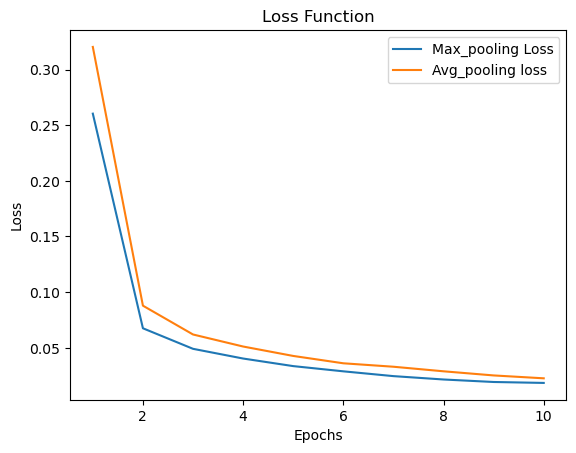

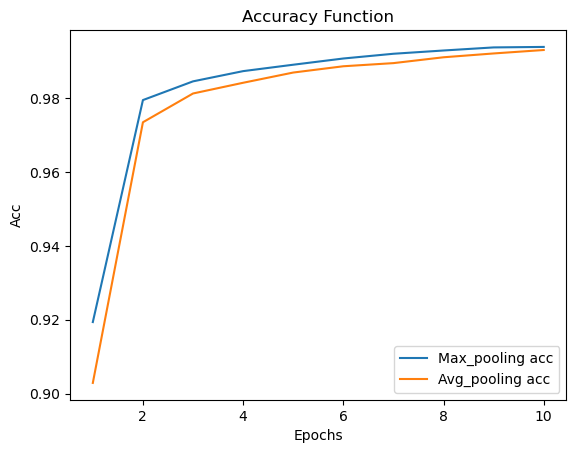

In [13]:
import matplotlib.pyplot as plt
loss_values_max = history_max.history['loss']
loss_values_avg = history_avg.history['loss']
epochs=range(1,history_avg.params['epochs']+1)

plt.plot(epochs, loss_values_max, label='Max_pooling Loss')
plt.plot(epochs, loss_values_avg, label='Avg_pooling loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.legend()
plt.show()

acc_values_max = history_max.history['accuracy']
acc_values_avg = history_avg.history['accuracy']

plt.plot(epochs, acc_values_max, label='Max_pooling acc')
plt.plot(epochs, acc_values_avg, label='Avg_pooling acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Accuracy Function')
plt.legend()
plt.show()